# Fitting temperature data

Here are the 5-year temperature averages again.

In [1]:
year = 1955:5:2000
t = year .- 1955;
y = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
    0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ];

The standard best-fit line results from using a linear polynomial that meets the least squares criterion.

In [2]:
V = [ t.^0 t ]    # Vandermonde-ish matrix
@show size(V)
c = V\y

size(V) = (10, 2)


2-element Array{Float64,1}:
 -0.12938181818181826
  0.011670303030303033

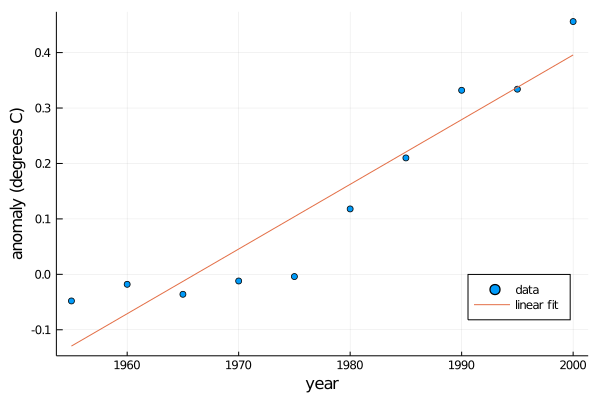

In [3]:
using Polynomials,Plots
p = Polynomial(c)
f = s -> p(s-1955)

scatter(year,y,label="data",
    xlabel="year",ylabel="anomaly (degrees C)",leg=:bottomright)
plot!(f,1955,2000,label="linear fit")

If we use a global cubic polynomial, the points are fit more closely.

In [4]:
V = [ t[i]^j for i=1:length(t), j=0:3 ]   # Vandermonde-ish matrix
@show size(V)

size(V) = (10, 4)


(10, 4)

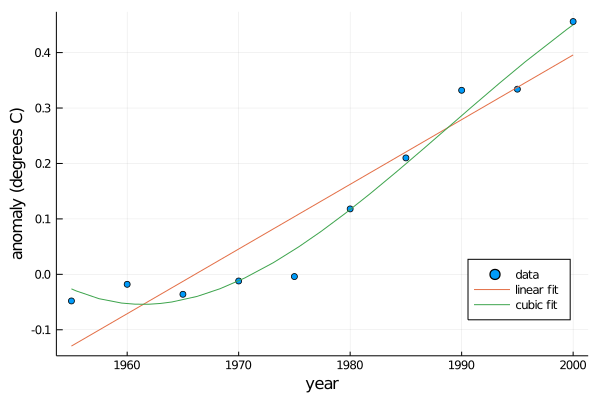

In [5]:
p = Polynomial( V\y )
f = s -> p(s-1955)

plot!(f,1955,2000,label="cubic fit")

If we were to continue increasing the degree of the polynomial, the residual at the data points would get smaller, but overfitting would increase.